In [1]:
# импорт необходимых библиотек
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

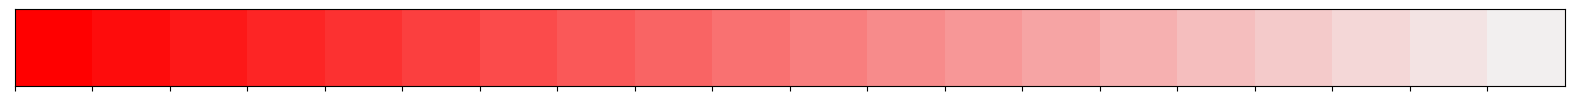

In [2]:
# задание палитры цветов
color_palette = sns.light_palette('red', n_colors=20, reverse=True)
sns.palplot(color_palette)
plt.show()

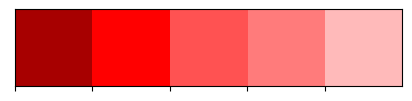

In [3]:
# задание палитры цветов
colors = ['#a70000', '#ff0000', '#ff5252', '#ff7b7b', '#ffbaba']
sns.palplot(sns.color_palette(colors))

In [4]:
import matplotlib.colors as mcolors


def make_colormap(seq):
    
    """ функция создания пользовательского
            масштабируемого цвета """
    
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [5]:
# задание палитры цветов красного
c = mcolors.ColorConverter().to_rgb
rvb = make_colormap([c('darkred'), c('brown'), 0.20, c('brown'), c('red'), 0.40, c('red'), \
                     c('indianred'), 0.60, c('indianred'), c('lightcoral'), 0.80, c('lightcoral')])

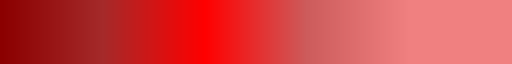

In [6]:
# вывод пользовательской палитры
rvb

In [7]:
# считывание данных с геоданными Московской агломерации
adm = pd.read_csv('data_clean/adm.csv')

In [8]:
# вывод данных
adm.head()

,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,MULTIPOLYGON (((38.6495389842383 54.2597139180...,0,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
1,MULTIPOLYGON (((38.6549362377517 54.2572466621...,1,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
2,MULTIPOLYGON (((38.6625773861122 54.2560891872...,2,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
3,MULTIPOLYGON (((38.670279125503 54.25708620909...,3,Серебряные пруды,Серебряные пруды,Московская область,0.25,1
4,MULTIPOLYGON (((38.6779821287111 54.2581143832...,4,Серебряные пруды,Серебряные пруды,Московская область,0.25,1


### Анализ изменения численности населения 

In [9]:
# считывание данных по изменению численности населения
clocation = pd.read_csv('data/01_Clocation_202109.csv')

In [10]:
# вывод данных
clocation.head()

,dt,zid,customers_cnt_home,customers_cnt_job,customers_cnt_day,customers_cnt_night
0,2021-09-30,32909,1,0,0,3
1,2021-09-30,32910,2,0,0,4
2,2021-09-30,33261,0,0,0,2
3,2021-09-30,33262,1,0,0,5
4,2021-09-30,33263,0,0,0,4


In [11]:
# признаки данных
clocation.columns

Index(['dt', 'zid', 'customers_cnt_home', 'customers_cnt_job',
       'customers_cnt_day', 'customers_cnt_night'],
      dtype='object')

In [12]:
'customers_cnt_home'.replace('customers_', '')

'cnt_home'

In [13]:
# переименование признаков
clocation.columns = [column.replace('customers_', '') for column in clocation.columns]

In [14]:
# проверка изменений
clocation.columns

Index(['dt', 'zid', 'cnt_home', 'cnt_job', 'cnt_day', 'cnt_night'], dtype='object')

In [15]:
# объединение данных изменения численности населения с данными административных районов Московской агломерации
clocation = clocation.merge(adm, left_on='zid', right_on='cell_zid')

In [16]:
# показатели изменения численности населения Московской агломерации
indicator = clocation.columns[2:6]
indicator

Index(['cnt_home', 'cnt_job', 'cnt_day', 'cnt_night'], dtype='object')

In [17]:
# задание формата отображения чисел
pd.options.display.float_format ='{:,.2f}'.format

In [18]:
# импорт библиотеки для работы с географическими координатами
from shapely import wkt

In [19]:
# преобразование признака в географические координаты
clocation['geometry'] = clocation['geometry'].apply(wkt.loads)

In [20]:
# задание геометрии DataFrame
clocation = clocation.set_geometry('geometry')

In [21]:
# вывод проекции
print(clocation.crs)

None


In [22]:
# задание проектции
clocation.crs = "epsg:3857"

In [23]:
print(clocation.crs)

epsg:3857


In [24]:
#непосредственно преобразование проекции
clocation = clocation.to_crs({'init' :'epsg:3857'}) 

C:\Users\rus_k\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


[**Зеленоград**](https://ru.wikipedia.org/wiki/%D0%97%D0%B5%D0%BB%D0%B5%D0%BD%D0%BE%D0%B3%D1%80%D0%B0%D0%B4)(букв. зелёный город; полностью официально Зеленогра́дский администрати́вный о́круг) — город в России, образующий один из 12 административных округов Москвы. Расположен в 37 км к северо-западу от центра Москвы. Первый из трёх округов, которые были образованы на территориях, полностью находящихся за пределами Московской кольцевой автомобильной дороги. Один из основных научно-производственных центров советской и российской электроники и микроэлектроники.

По состоянию на 2021 год самый маленький по территории и предпоследний по населению округ Москвы. Вместе с тем Зеленоград как обособленный населённый пункт[4] мог бы войти в пятёрку крупнейших городов Подмосковья (уступая Балашихе, Подольску, Химкам и опережая Мытищи) и в первую сотню городов России.

Со всех сторон окружён территорией Московской области (на западе и севере граничит с городским округом Солнечногорском, на востоке и юге — с городским округом Химки[5]) и является самым крупным эксклавом Москвы. В состав Зеленограда входят также посёлок Малино, часть посёлка Алабушево, деревни: Кутузово, Новомалино и Рожки[6]. На западной границе находится в непосредственном соприкосновении с поселением Андреевкой городского округа Солнечногорск, образуя с ним агломерацию[7].

До расширения территории Москвы в 2012 году Зеленоград по доле зелёных насаждений в общей площади (~30 %) занимал второе место среди административных округов Москвы, уступая только Восточному административному округу[8].

Известен под прозвищем советская/русская/российская Силиконовая (Кремниевая) долина[9][10].

In [25]:
# выборка данных по выбранному округу
zelenograd_okrug = clocation[clocation['okrug_name'] == 'Зеленоградский административный округ']

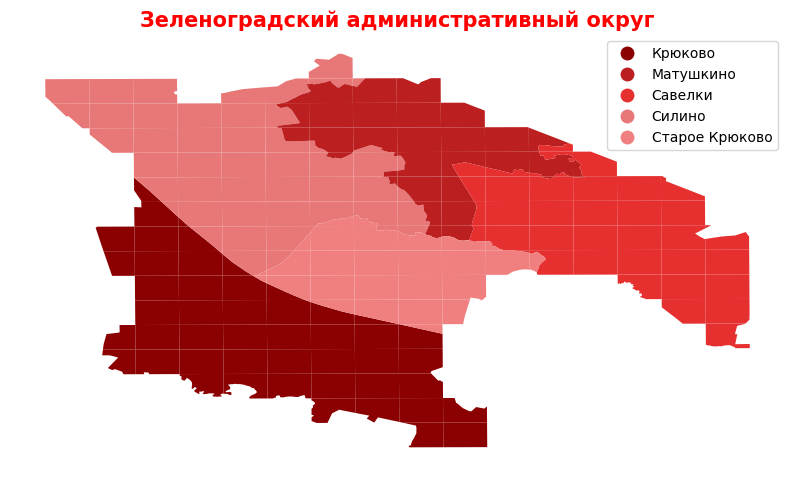

In [26]:
# визуализация административных районов в Зеленоградском административном округе
zelenograd_okrug.plot(column = 'adm_name', linewidth=0.5, cmap=rvb, legend=True, figsize=[10,20])
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.title('Зеленоградский административный округ', loc='center', fontweight='bold', color='r', fontsize=15)
plt.show()

In [27]:
# корреляция признаков изменения численности населения в Троицком административном округе
zelenograd_okrug_corr = zelenograd_okrug[indicator].corr()
zelenograd_okrug_corr

,cnt_home,cnt_job,cnt_day,cnt_night
cnt_home,1.00,0.77,0.93,1.00
cnt_job,0.77,1.00,0.95,0.77
cnt_day,0.93,0.95,1.00,0.93
cnt_night,1.00,0.77,0.93,1.00


C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\3343128891.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(zelenograd_okrug_corr, dtype=np.bool))


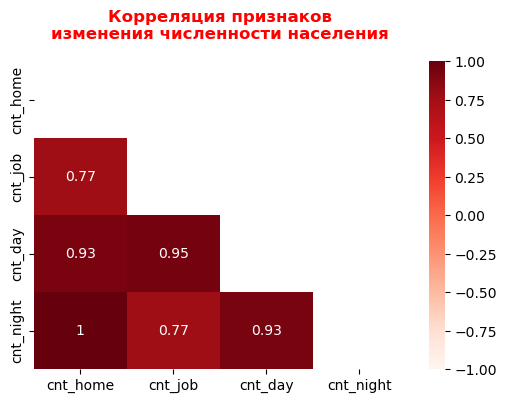

In [28]:
# визуализация корреляции признаков изменения численности населения в Троицком административном округе
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(zelenograd_okrug_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(zelenograd_okrug_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nизменения численности населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [29]:
# расчет площади по административным районам
zelenograd_okrug_area = zelenograd_okrug.groupby('adm_name')['area'].sum().sort_values(ascending=False)
zelenograd_okrug_area

adm_name
Силино           13.00
Крюково          12.25
Савелки           9.00
Матушкино         8.00
Старое Крюково    7.00
Name: area, dtype: float64

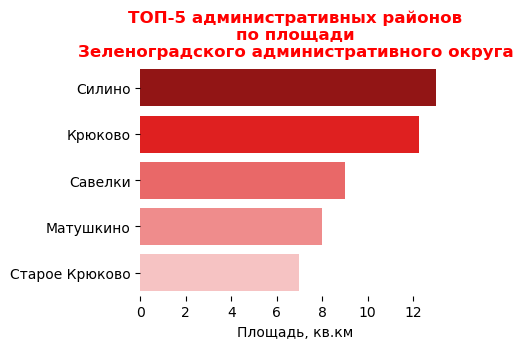

In [30]:
# визуализация ТОП-5 административных районов Троицкого административного округа по площади
plt.figure(figsize=(4,3))
sns.barplot(x=zelenograd_okrug_area.values[:5], y=zelenograd_okrug_area.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо площади\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.box(on=None)
plt.xlabel('Площадь, кв.км')
plt.ylabel('')
plt.show()

In [31]:
# пересчет показателей изменения численности населения с учетом пересечения секторов
zelenograd_okrug = zelenograd_okrug[indicator].apply(lambda x: x / zelenograd_okrug['conts_zid']) \
                                          .merge(zelenograd_okrug.iloc[:,6:], left_index=True, right_index=True)
zelenograd_okrug.head()

,cnt_home,cnt_job,cnt_day,cnt_night,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
13609,13.50,14.00,14.50,23.50,"MULTIPOLYGON (((37.201 55.954, 37.208 55.954, ...",132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
13611,0.00,28.00,28.00,41.00,"MULTIPOLYGON (((37.208 55.949, 37.208 55.954, ...",132680,Крюково,Зеленоградский административный округ,Старая Москва,0.25,1
13639,70.00,41.00,49.50,108.00,"MULTIPOLYGON (((37.184 55.954, 37.184 55.955, ...",133147,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
13641,32.00,25.50,28.50,49.50,"MULTIPOLYGON (((37.192 55.956, 37.192 55.958, ...",133148,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
13643,105.50,49.00,86.00,137.00,"MULTIPOLYGON (((37.200 55.954, 37.200 55.958, ...",133149,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2


In [32]:
# расчет суммарного количества изменения населения по административным округам
zelenograd_okrug_customers =  zelenograd_okrug.groupby('adm_name')[indicator].sum()
zelenograd_okrug_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Крюково,"48,092.00","17,469.17","33,585.17","62,138.33"
Матушкино,"22,693.17","12,362.50","20,152.50","30,706.33"
Савелки,"20,806.83","11,704.67","18,949.17","28,100.33"
Силино,"24,869.00","11,893.83","20,152.83","35,086.83"
Старое Крюково,"20,370.17","12,280.50","19,422.50","26,905.83"


In [33]:
# максимальное значение показателя для визуализации
zelenograd_okrug_customers.max().max()

62138.333333333336

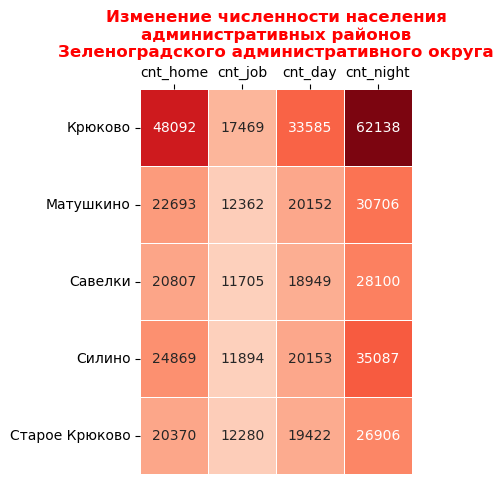

In [34]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(3.5, 5))
sns.heatmap(zelenograd_okrug_customers, vmin=0, vmax=65000, linewidths=.5, fmt='.0f', annot=True, cmap='Reds', cbar=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Изменение численности населения\nадминистративных районов\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.show()

In [35]:
# нормирование показателей изменения численности населения с учетом площади административного района
zelenograd_okrug_new_customers = zelenograd_okrug_customers.apply(lambda x: x / zelenograd_okrug_area)
zelenograd_okrug_new_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Крюково,"3,925.88","1,426.05","2,741.65","5,072.52"
Матушкино,"2,836.65","1,545.31","2,519.06","3,838.29"
Савелки,"2,311.87","1,300.52","2,105.46","3,122.26"
Силино,"1,913.00",914.91,"1,550.22","2,698.99"
Старое Крюково,"2,910.02","1,754.36","2,774.64","3,843.69"


In [36]:
# максимальное значение показателя для визуализации
zelenograd_okrug_new_customers.max().max()

5072.517006802721

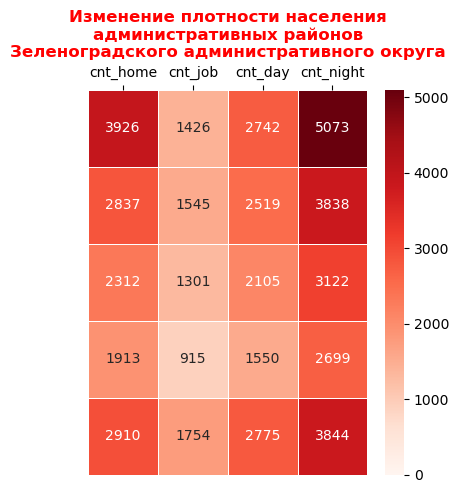

In [37]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(4.5, 5))
sns.heatmap(zelenograd_okrug_new_customers, vmin=0, vmax=5100, linewidths=.5, fmt='.0f', annot=True, cmap='Reds')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.title('Изменение плотности населения\nадминистративных районов\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks([])
plt.ylabel('')
plt.show()

In [38]:
zelenograd_okrug_new_customers

,cnt_home,cnt_job,cnt_day,cnt_night
adm_name,,,,
Крюково,"3,925.88","1,426.05","2,741.65","5,072.52"
Матушкино,"2,836.65","1,545.31","2,519.06","3,838.29"
Савелки,"2,311.87","1,300.52","2,105.46","3,122.26"
Силино,"1,913.00",914.91,"1,550.22","2,698.99"
Старое Крюково,"2,910.02","1,754.36","2,774.64","3,843.69"


In [39]:
# антирейтинг административных районов по динамике изменения плотности численности населения
zelenograd_okrug_new_customers.std(axis=1).sort_values()

adm_name
Силино             744.52
Савелки            748.48
Старое Крюково     855.12
Матушкино          945.08
Крюково          1,565.96
dtype: float64

In [40]:
# антирейтинг административных районов по динамике изменения плотности численности населения
zelenograd_okrug_rating = zelenograd_okrug_new_customers.std(axis=1).sort_values() \
                                                    .rank(ascending=False)
zelenograd_okrug_rating

adm_name
Силино           5.00
Савелки          4.00
Старое Крюково   3.00
Матушкино        2.00
Крюково          1.00
dtype: float64

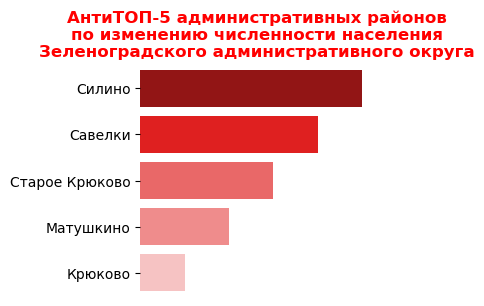

In [41]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_rating.values[:5], y = zelenograd_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо изменению численности населения\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [42]:
# рейтинг административных районов по динамике изменения плотности численности населения
zelenograd_okrug_rating = zelenograd_okrug_new_customers.std(axis=1).sort_values(ascending=False) \
                                                    .rank()
zelenograd_okrug_rating

adm_name
Крюково          5.00
Матушкино        4.00
Старое Крюково   3.00
Савелки          2.00
Силино           1.00
dtype: float64

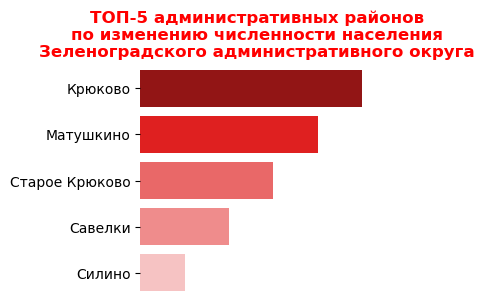

In [43]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x=zelenograd_okrug_rating.values[:5], y=zelenograd_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо изменению численности населения\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

### Анализ изменения плотности населения

In [44]:
# считывание данных по изменению плотности населения
cdensity = pd.read_csv('data/02_CDensity_202109.csv')

In [45]:
# вывод данных
cdensity.head()

,dt,time_interval,zid,median_customers_cnt_total,median_customers_cnt_long,median_customers_cnt_work,median_customers_cnt_loc,median_customers_cnt_long_work,median_customers_cnt_long_loc
0,2021-09-01,1,32909,1.00,1.00,0.00,0.00,0.00,0.00
1,2021-09-01,1,32910,1.00,1.00,0.00,0.00,0.00,0.00
2,2021-09-01,1,33261,2.00,2.00,0.00,0.00,0.00,0.00
3,2021-09-01,1,33262,3.00,3.00,0.00,0.00,0.00,0.00
4,2021-09-01,1,33264,1.00,1.00,0.00,0.00,0.00,0.00


In [46]:
# признаки данных
cdensity.columns

Index(['dt', 'time_interval', 'zid', 'median_customers_cnt_total',
       'median_customers_cnt_long', 'median_customers_cnt_work',
       'median_customers_cnt_loc', 'median_customers_cnt_long_work',
       'median_customers_cnt_long_loc'],
      dtype='object')

In [47]:
'median_customers_cnt_total'.replace('median_customers_', '')

'cnt_total'

In [48]:
# переименование признаков
cdensity.columns = [column.replace('median_customers_', '') for column in cdensity.columns]

In [49]:
# проверка изменений
cdensity.columns

Index(['dt', 'time_interval', 'zid', 'cnt_total', 'cnt_long', 'cnt_work',
       'cnt_loc', 'cnt_long_work', 'cnt_long_loc'],
      dtype='object')

In [50]:
# показатели изменения плотности населения Московской агломерации
indicators = cdensity.columns[3:]
indicators

Index(['cnt_total', 'cnt_long', 'cnt_work', 'cnt_loc', 'cnt_long_work',
       'cnt_long_loc'],
      dtype='object')

In [51]:
# интервалы сбора данных
cdensity['time_interval'].unique()

array([1, 2, 3, 4], dtype=int64)

In [52]:
# данные кодировки интервалов
time_interval = {1 : '0-6', 2 : '6-12', 3 : '12-18', 4 : '18-24'}

In [53]:
# применение кодировки интервалов
cdensity['time_interval'] = cdensity['time_interval'].map(time_interval)

In [54]:
# объединение данных изменения плотности населения с данными административных районов Московской агломерации
cdensity = cdensity.merge(adm, left_on='zid', right_on='cell_zid')

In [55]:
# удаление признака разбиения сектора
cdensity.drop(columns='zid', inplace=True)

In [56]:
# вывод данных
cdensity.head()

,dt,time_interval,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
0,2021-09-01,0-6,1.00,1.00,0.00,0.00,0.00,0.00,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1
1,2021-09-01,6-12,2.00,0.00,0.00,0.00,0.00,0.00,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1
2,2021-09-01,12-18,1.00,1.00,0.00,0.00,0.00,0.00,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1
3,2021-09-01,18-24,1.00,0.00,0.00,0.00,0.00,0.00,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1
4,2021-09-02,0-6,1.00,1.00,0.00,0.00,0.00,0.00,MULTIPOLYGON (((37.0381820225216 55.1447963241...,32909,Роговское,Троицкий административный округ,Новая Москва,0.25,1


In [57]:
# выборка данных по выбранному округу
zelenograd_okrug = cdensity[cdensity['okrug_name'] == 'Зеленоградский административный округ']

In [58]:
# вывод данных
zelenograd_okrug.head()

,dt,time_interval,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
1630480,2021-09-01,0-6,38.00,32.50,3.50,11.00,3.00,10.00,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630482,2021-09-01,6-12,37.00,23.50,5.00,8.00,3.00,5.50,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630484,2021-09-01,12-18,41.50,25.00,9.00,7.00,6.00,3.00,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630486,2021-09-01,18-24,39.50,22.50,5.00,8.00,4.00,4.50,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630488,2021-09-02,0-6,39.50,31.00,3.00,10.00,3.00,9.50,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2


In [59]:
# пересчет показателей изменения плотности населения с учетом пересечения секторов
zelenograd_okrug = zelenograd_okrug[indicators].apply(lambda x: x / zelenograd_okrug['conts_zid']) \
                 .merge(zelenograd_okrug.drop(columns=indicators), left_index=True, right_index=True)
zelenograd_okrug.head()

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc,dt,time_interval,geometry,cell_zid,adm_name,okrug_name,sub_ter,area,conts_zid
1630480,19.00,16.25,1.75,5.50,1.50,5.00,2021-09-01,0-6,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630482,18.50,11.75,2.50,4.00,1.50,2.75,2021-09-01,6-12,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630484,20.75,12.50,4.50,3.50,3.00,1.50,2021-09-01,12-18,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630486,19.75,11.25,2.50,4.00,2.00,2.25,2021-09-01,18-24,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2
1630488,19.75,15.50,1.50,5.00,1.50,4.75,2021-09-02,0-6,MULTIPOLYGON (((37.2005508886502 55.9537964048...,132679,Крюково,Зеленоградский административный округ,Старая Москва,0.25,2


In [60]:
# корреляция признаков изменения плотности населения в Троицком административном округе
zelenograd_okrug_corr = zelenograd_okrug.iloc[:,:6].corr()
zelenograd_okrug_corr

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
cnt_total,1.00,0.99,0.78,0.96,0.84,0.94
cnt_long,0.99,1.00,0.73,0.97,0.80,0.97
cnt_work,0.78,0.73,1.00,0.63,0.99,0.60
cnt_loc,0.96,0.97,0.63,1.00,0.71,1.00
cnt_long_work,0.84,0.80,0.99,0.71,1.00,0.69
cnt_long_loc,0.94,0.97,0.60,1.00,0.69,1.00


C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\4125937994.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(zelenograd_okrug_corr, dtype=np.bool))


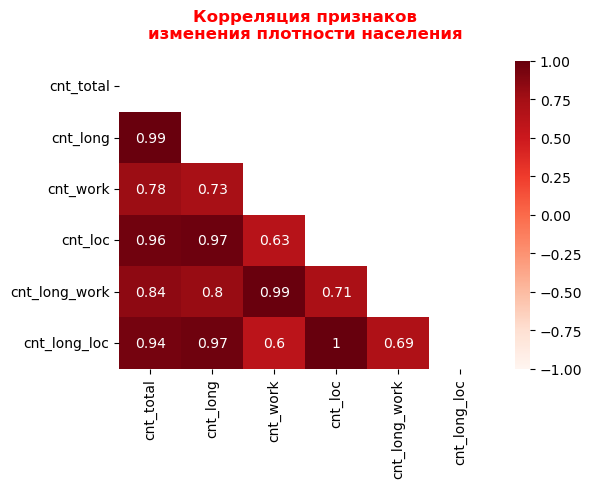

In [61]:
# визуализация корреляции признаков изменения численности населения в Троицком административном округе
plt.figure(figsize=(6, 4))
mask = np.triu(np.ones_like(zelenograd_okrug_corr, dtype=np.bool))
clocation_corr_heatmap = sns.heatmap(zelenograd_okrug_corr, mask=mask, vmin=-1, vmax=1, \
                                     annot=True, cmap='Reds')
clocation_corr_heatmap.set_title('Корреляция признаков\nизменения плотности населения', \
                                 c='r', fontweight='bold', fontdict={'fontsize':12}, pad=16);

In [62]:
# подсчет сумарного изменения числености плотности по дням в разрезе соответствующего административного района
zelenograd_okrug_dt = zelenograd_okrug.groupby(['adm_name', 'dt'])[indicators].sum()
zelenograd_okrug_dt.head()

cnt_total   cnt_long  cnt_work   cnt_loc  cnt_long_work  \
adm_name dt                                                                    
Крюково  2021-09-01 197,756.33 151,546.50 17,231.33 68,075.00      12,805.58   
         2021-09-02 195,989.58 150,751.33 17,971.33 67,991.17      13,299.75   
         2021-09-03 193,067.67 149,175.92 17,372.58 67,043.83      12,980.92   
         2021-09-04 186,354.75 148,384.08 11,416.42 69,371.83       9,259.08   
         2021-09-05 189,487.92 152,798.25 11,155.25 72,536.83       9,178.42   

                     cnt_long_loc  
adm_name dt                        
Крюково  2021-09-01     55,618.75  
         2021-09-02     55,866.00  
         2021-09-03     55,379.58  
         2021-09-04     58,083.83  
         2021-09-05     61,311.08

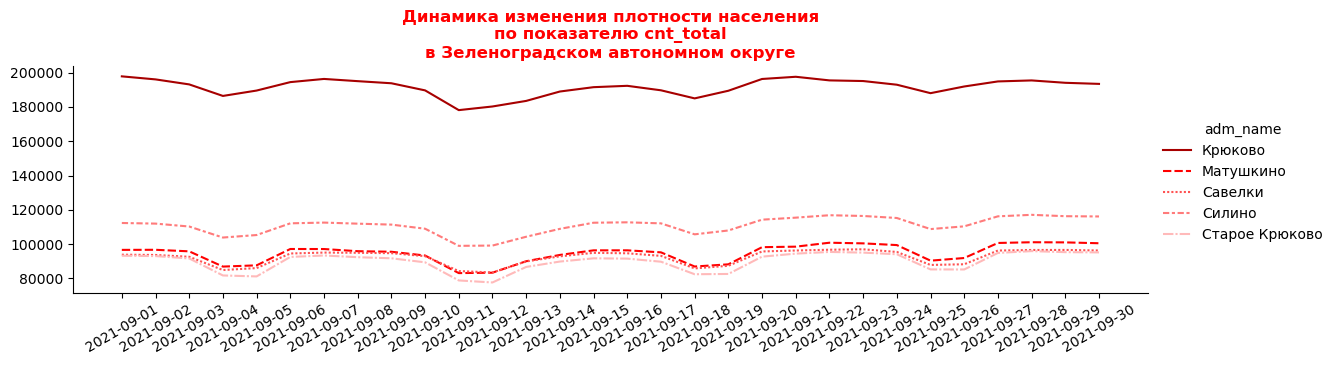

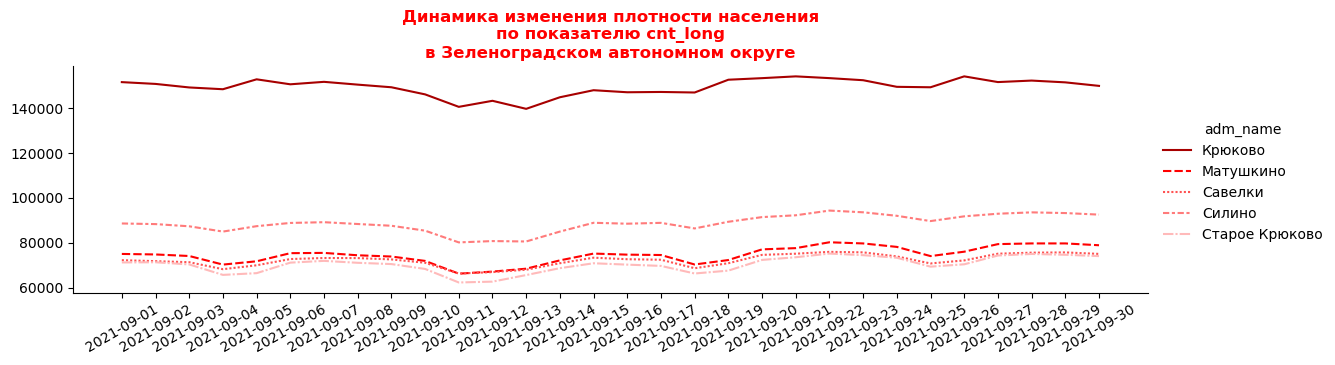

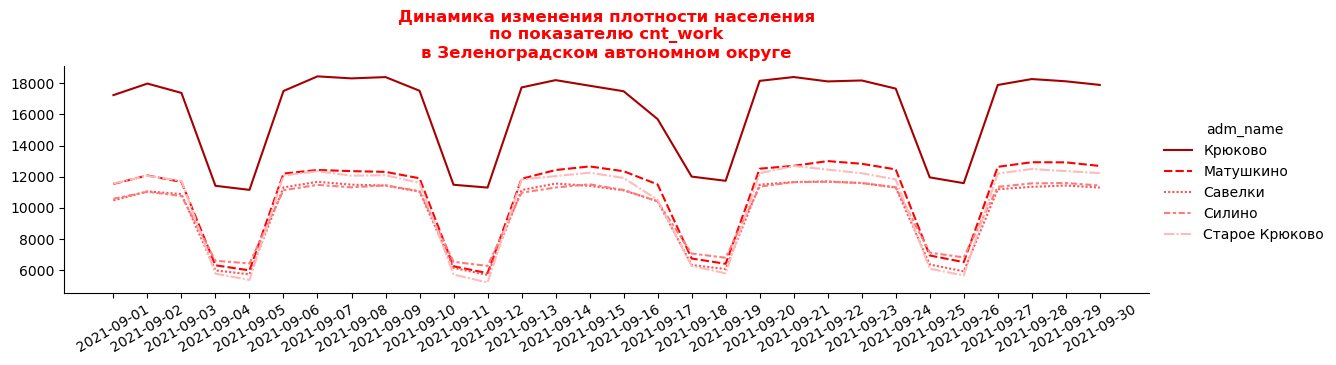

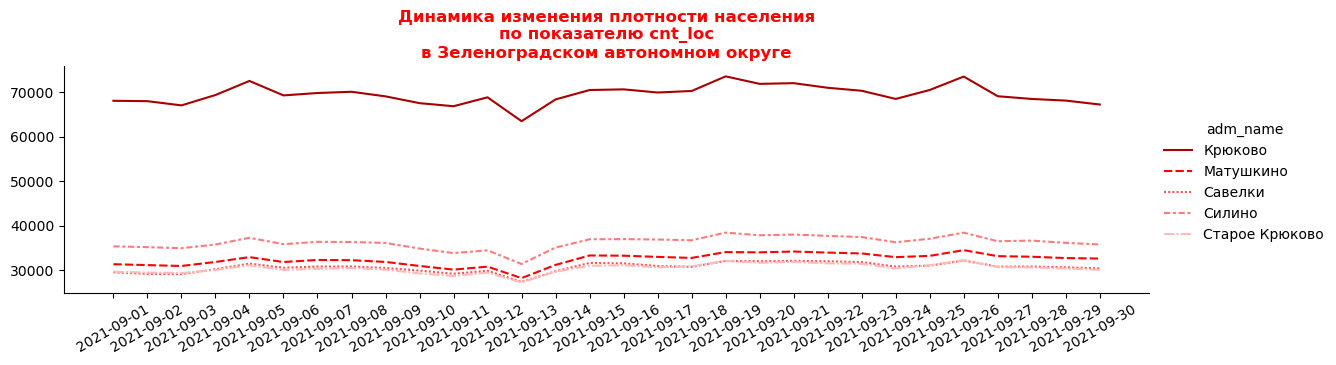

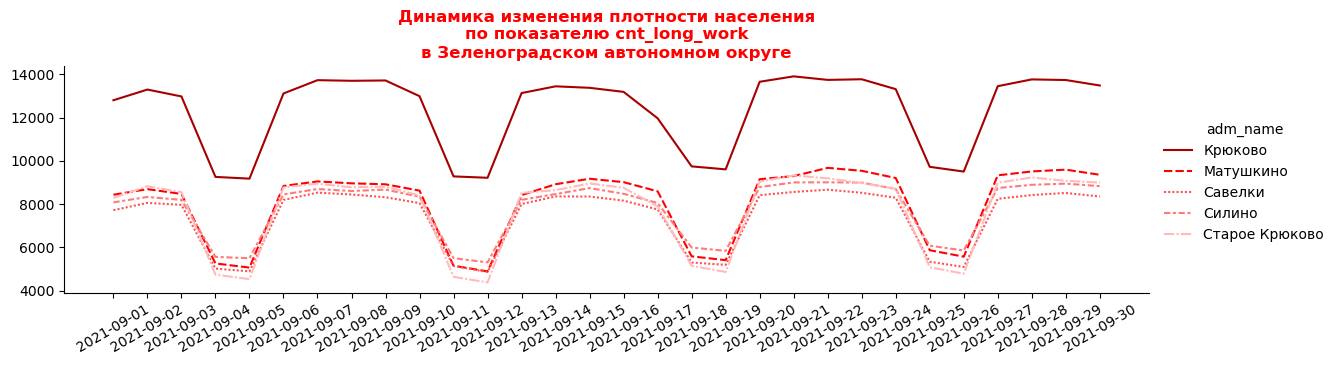

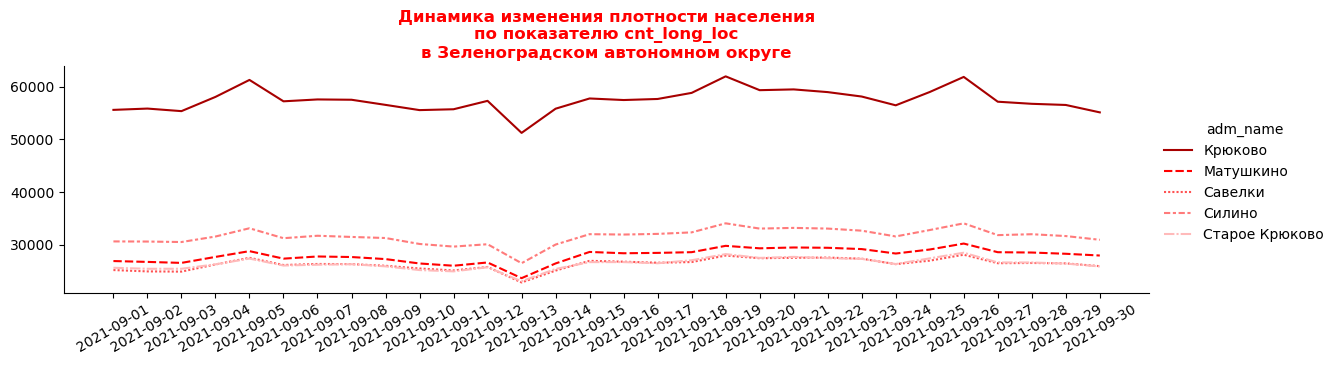

In [63]:
# визуализация изменения плотности населения по дням в по соответствующим районам округа
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'adm_name', height=3, aspect=4,\
            palette=sns.color_palette(colors), style="adm_name", data = zelenograd_okrug_dt, kind="line")
    plt.xticks(rotation=30, ha="center")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Зеленоградском автономном округе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [64]:
# получение временого ряда по Вороновскому административному району
zelenograd_okrug_dt.loc['Крюково']['cnt_total']

dt
2021-09-01   197,756.33
2021-09-02   195,989.58
2021-09-03   193,067.67
2021-09-04   186,354.75
2021-09-05   189,487.92
2021-09-06   194,403.67
2021-09-07   196,255.33
2021-09-08   194,962.50
2021-09-09   193,734.00
2021-09-10   189,587.50
2021-09-11   178,087.67
2021-09-12   180,208.92
2021-09-13   183,458.58
2021-09-14   188,924.67
2021-09-15   191,458.50
2021-09-16   192,247.50
2021-09-17   189,635.25
2021-09-18   184,925.58
2021-09-19   189,374.75
2021-09-20   196,232.67
2021-09-21   197,514.75
2021-09-22   195,408.17
2021-09-23   195,033.33
2021-09-24   192,892.42
2021-09-25   187,962.58
2021-09-26   191,857.42
2021-09-27   194,806.33
2021-09-28   195,386.83
2021-09-29   194,006.50
2021-09-30   193,372.58
Name: cnt_total, dtype: float64

In [65]:
# импорт библиотек для анализа времянных рядов
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, adfuller

In [66]:
# проверка гипотезы на стационарность
p_value = adfuller(zelenograd_okrug_dt.loc['Крюково']['cnt_total'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.0625. 0.0625 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [67]:
# подсчет сумарного изменения числености плотности по дням
# с учетом временного интервалав разрезе соответствующего административного района
zelenograd_okrug_time = zelenograd_okrug.groupby(['adm_name', 'dt', 'time_interval'])[indicators].sum()
zelenograd_okrug_time.head()

cnt_total  cnt_long  cnt_work   cnt_loc  \
adm_name dt         time_interval                                            
Крюково  2021-09-01 0-6            51,225.92 45,803.75  2,731.67 20,746.42   
                    12-18          46,635.83 32,663.58  5,644.83 13,578.58   
                    18-24          50,121.92 37,680.17  3,156.92 18,809.42   
                    6-12           49,772.67 35,399.00  5,697.92 14,940.58   
         2021-09-02 0-6            51,418.17 45,730.17  2,770.67 21,287.33   

                                   cnt_long_work  cnt_long_loc  
adm_name dt         time_interval                               
Крюково  2021-09-01 0-6                 2,440.25     18,860.17  
                    12-18               3,894.92     10,365.67  
                    18-24               2,505.17     14,772.92  
                    6-12                3,965.25     11,620.00  
         2021-09-02 0-6                 2,450.67     19,291.92

In [68]:
# выбор одного из районов
zelenograd_okrug_time.loc['Крюково'].head()

cnt_total  cnt_long  cnt_work   cnt_loc  \
dt         time_interval                                            
2021-09-01 0-6            51,225.92 45,803.75  2,731.67 20,746.42   
           12-18          46,635.83 32,663.58  5,644.83 13,578.58   
           18-24          50,121.92 37,680.17  3,156.92 18,809.42   
           6-12           49,772.67 35,399.00  5,697.92 14,940.58   
2021-09-02 0-6            51,418.17 45,730.17  2,770.67 21,287.33   

                          cnt_long_work  cnt_long_loc  
dt         time_interval                               
2021-09-01 0-6                 2,440.25     18,860.17  
           12-18               3,894.92     10,365.67  
           18-24               2,505.17     14,772.92  
           6-12                3,965.25     11,620.00  
2021-09-02 0-6                 2,450.67     19,291.92

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


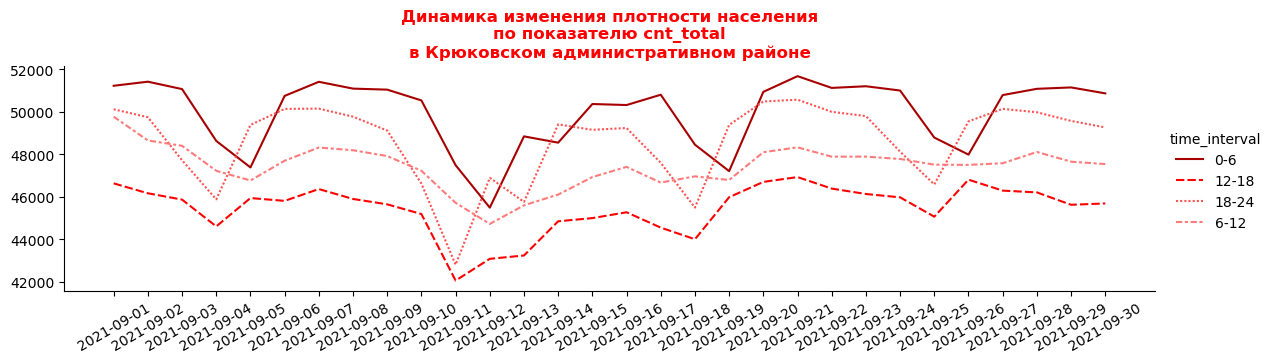

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


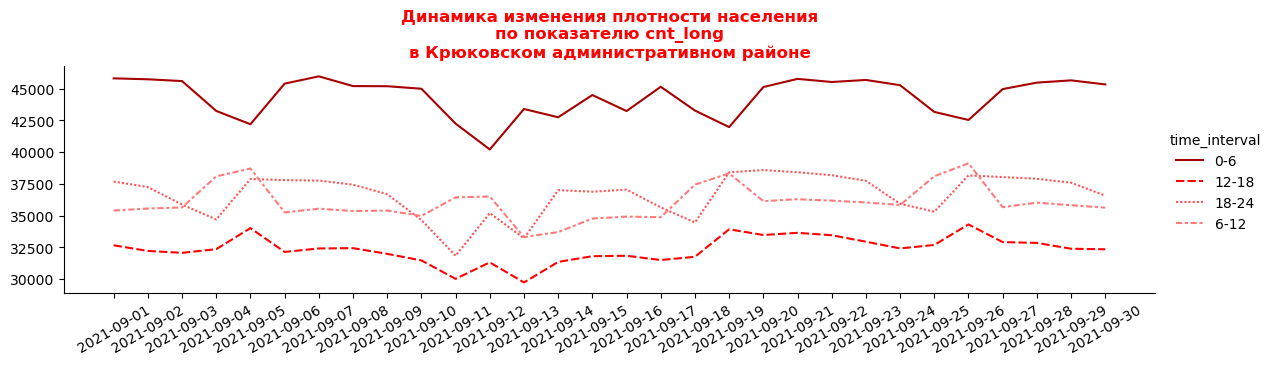

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


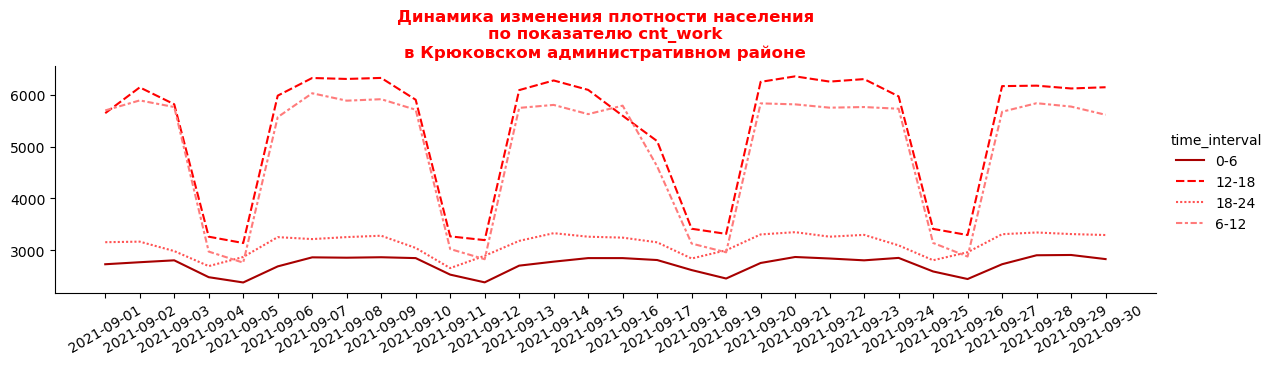

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


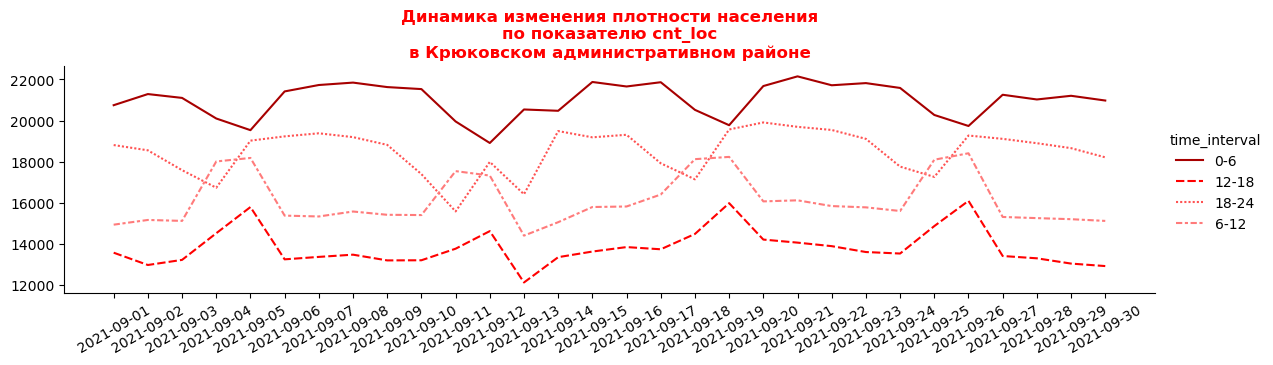

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


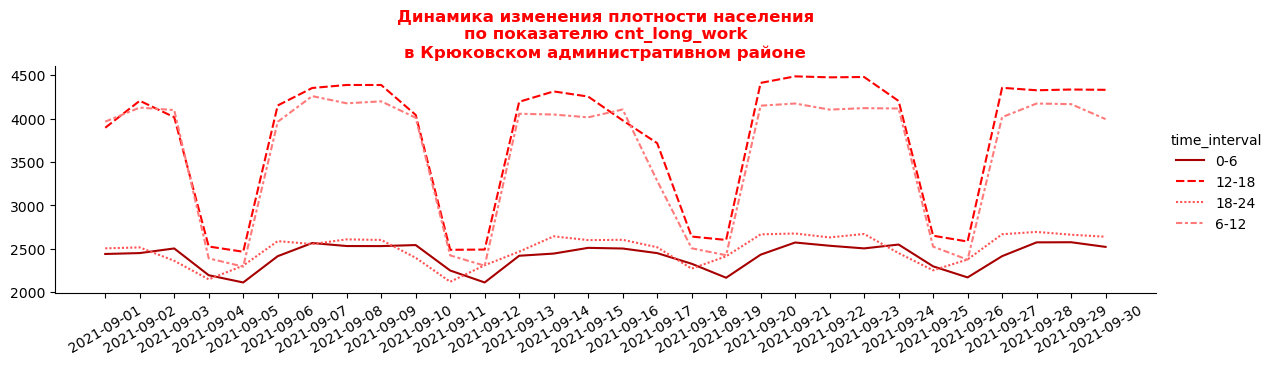

C:\Users\rus_k\AppData\Local\Temp\ipykernel_10416\60530786.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\


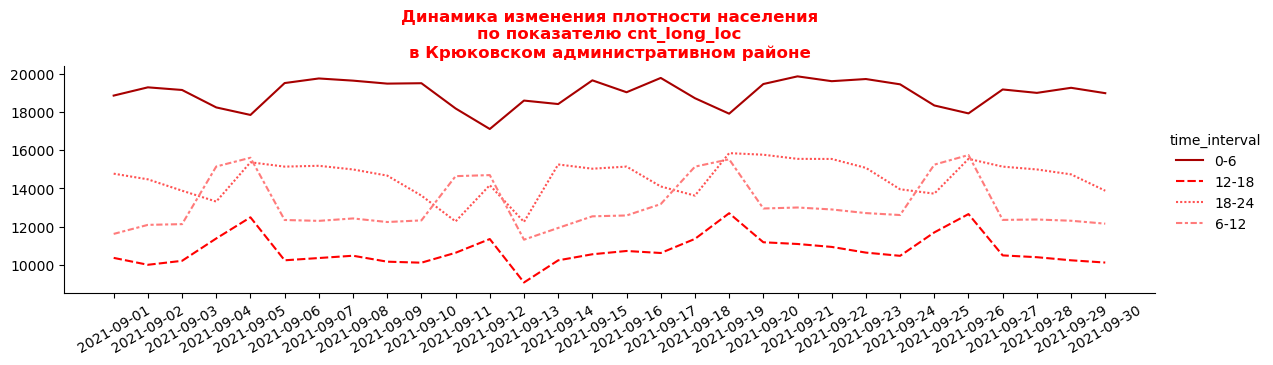

In [69]:
# визуализация изменения плотности населения по дням в рамках временных интервалов
for indicator in indicators:
    sns.relplot(x = 'dt', y = indicator, hue= 'time_interval', height=3, aspect=4,\
                palette=sns.color_palette(colors), style="time_interval", \
                data = zelenograd_okrug_time.loc['Крюково'], kind="line")
    plt.xticks(rotation=30, ha="center")
    plt.title(f'Динамика изменения плотности населения\nпо показателю {indicator}\nв Крюковском административном районе', \
          c='r', fontweight='bold', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [70]:
# выборка временного ряда
zelenograd_okrug_time.loc['Крюково'].unstack()['cnt_total']['0-6']

dt
2021-09-01   51,225.92
2021-09-02   51,418.17
2021-09-03   51,070.50
2021-09-04   48,632.42
2021-09-05   47,386.08
2021-09-06   50,750.17
2021-09-07   51,412.75
2021-09-08   51,092.33
2021-09-09   51,043.83
2021-09-10   50,537.08
2021-09-11   47,491.00
2021-09-12   45,494.58
2021-09-13   48,846.25
2021-09-14   48,550.75
2021-09-15   50,368.17
2021-09-16   50,320.25
2021-09-17   50,804.67
2021-09-18   48,456.25
2021-09-19   47,210.83
2021-09-20   50,939.50
2021-09-21   51,678.25
2021-09-22   51,125.50
2021-09-23   51,203.50
2021-09-24   51,002.17
2021-09-25   48,790.17
2021-09-26   47,988.42
2021-09-27   50,788.00
2021-09-28   51,082.50
2021-09-29   51,148.17
2021-09-30   50,868.83
Name: 0-6, dtype: float64

In [71]:
# проверка гипотезы на стационарность
p_value = adfuller(zelenograd_okrug_time.loc['Крюково'].unstack()['cnt_total']['0-6'])[1]
print(f'Полученный уровень значимости (p-value): {round(p_value, 4)}.',
      f'{round(p_value, 4)} > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!')

Полученный уровень значимости (p-value): 0.1432. 0.1432 > 0.05. Нулевая гипотеза не отвергнута в пользу альтернативной!


In [72]:
# выборка изменения плотности населения по одному из административному району и показателю
zelenograd_okrug_dt.loc['Крюково'][['cnt_long']]

,cnt_long
dt,
2021-09-01,"151,546.50"
2021-09-02,"150,751.33"
2021-09-03,"149,175.92"
2021-09-04,"148,384.08"
2021-09-05,"152,798.25"
2021-09-06,"150,579.17"
2021-09-07,"151,676.58"
2021-09-08,"150,433.50"
2021-09-09,"149,260.42"


In [73]:
# импорт библиотек для цветовой палитры
from matplotlib.collections import PolyCollection

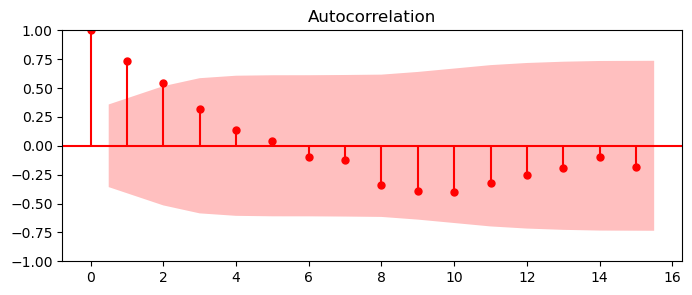

In [74]:
# визуализация корреляции времянного ряда
fig, ax = plt.subplots(figsize=(8, 3))
my_color="red"
#change the color of the vlines
plot_acf(zelenograd_okrug_dt.loc['Крюково']['cnt_long'].values.squeeze(), \
         lags=15, ax=ax, color=my_color, vlines_kwargs={"colors": my_color})
#get polygon patch collections and change their color
for item in ax.collections:
    if type(item)==PolyCollection:
        item.set_facecolor(my_color)

plt.show()

In [75]:
# смена типа данных
zelenograd_okrug['dt'] = pd.to_datetime(zelenograd_okrug['dt'])

In [76]:
# создание признака дня недели
zelenograd_okrug['weekday'] = zelenograd_okrug['dt'].dt.weekday

In [77]:
# дни недели
zelenograd_okrug['weekday'].unique()

array([2, 3, 4, 5, 6, 0, 1], dtype=int64)

In [78]:
# словарь конвертации признака дня недели
data_week = {0 : 'пн', 1 : 'вт', 2 : 'ср', 3 : 'чт', 4 : 'пт', 5 : 'сб', 6 : 'вс'}

In [79]:
# создание признака дня недели
zelenograd_okrug['weekday'] = zelenograd_okrug['weekday'].map(data_week)

In [80]:
# расчет суммарной площади по административным районам
adm_name_area = zelenograd_okrug.drop_duplicates(subset='cell_zid').groupby('adm_name')['area'].sum().sort_values(ascending=False)
adm_name_area

adm_name
Крюково          12.25
Силино           11.25
Савелки           6.50
Матушкино         4.50
Старое Крюково    2.25
Name: area, dtype: float64

In [81]:
# расчет средних показателей изменения плотности населения по административным районам
zelenograd_okrug_cnt = zelenograd_okrug.groupby('adm_name')[indicators].mean()
zelenograd_okrug_cnt

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
adm_name,,,,,,
Крюково,976.94,762.20,82.46,354.43,62.90,293.16
Матушкино,739.54,583.06,84.11,253.43,62.91,218.14
Савелки,642.06,501.52,68.61,213.15,51.56,182.65
Силино,533.08,426.59,48.31,174.29,37.64,151.83
Старое Крюково,802.29,627.73,92.49,271.95,69.00,235.51


In [82]:
# максимальное значение показателя для визуализации
zelenograd_okrug_cnt.max().max()

976.9377976190476

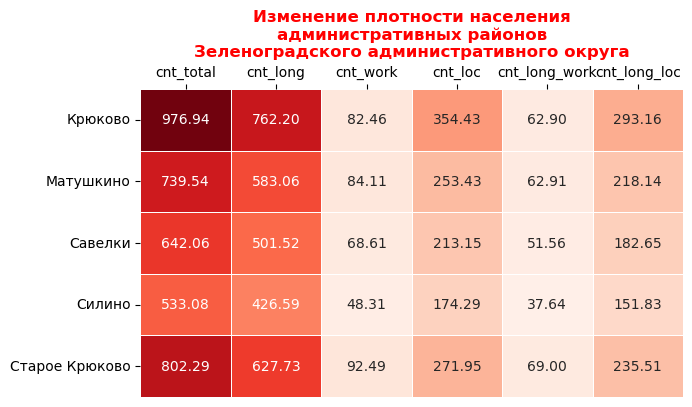

In [83]:
# визуализация рассчитанных показателей изменения плотности по административным районам
f, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(zelenograd_okrug_cnt, vmin=0, vmax=1000, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=False)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks()
plt.ylabel('')
plt.show()

In [84]:
# нормирование показателей изменения численности населения с учетом площади административного района
zelenograd_okrug_cnt = (zelenograd_okrug_cnt.T / adm_name_area).T
zelenograd_okrug_cnt

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
adm_name,,,,,,
Крюково,79.75,62.22,6.73,28.93,5.13,23.93
Матушкино,164.34,129.57,18.69,56.32,13.98,48.48
Савелки,98.78,77.16,10.55,32.79,7.93,28.10
Силино,47.38,37.92,4.29,15.49,3.35,13.50
Старое Крюково,356.57,278.99,41.11,120.86,30.67,104.67


In [85]:
# максимальное значение показателя для визуализации
zelenograd_okrug_cnt.max().max()

356.5728615520282

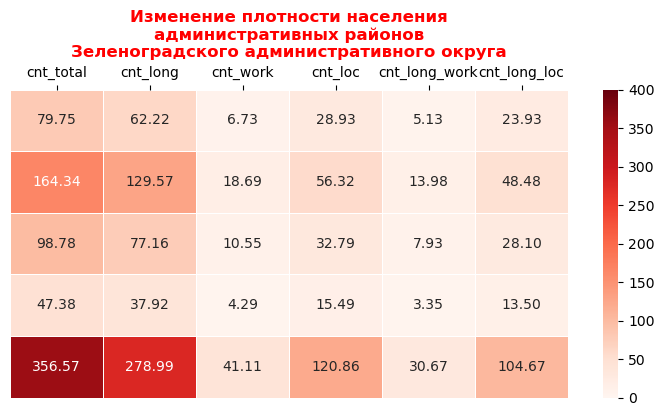

In [86]:
# визуализация рассчитанных показателей изменения численности по административным районам
f, ax = plt.subplots(figsize=(9, 4))
sns.heatmap(zelenograd_okrug_cnt, vmin=0, vmax=400, linewidths=.5, fmt='.2f', annot=True, cmap='Reds')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.ylabel('')
plt.yticks([])
plt.show()

In [87]:
# дни недели
zelenograd_okrug['weekday'].unique()

array(['ср', 'чт', 'пт', 'сб', 'вс', 'пн', 'вт'], dtype=object)

In [88]:
# функция конвертации дня недели в рабочий/не рабочий день
def work_day(day):
    
    """
    day: день недели, str
    """
    
    if day in ['сб', 'вс']:
        return 'выходной'
    else:
        return 'рабочий'

In [89]:
# конвертация дня недели
zelenograd_okrug['workday'] = zelenograd_okrug['weekday'].apply(lambda x: work_day(x))

In [90]:
# показатели изменения плотности населения по дням
zelenograd_okrug_workday = zelenograd_okrug.groupby(['workday', 'adm_name'], as_index=False)[indicators].mean()
zelenograd_okrug_workday

,workday,adm_name,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
0,выходной,Крюково,949.15,757.57,59.09,360.63,48.17,302.42
1,выходной,Матушкино,682.29,554.92,49.83,254.41,41.78,221.37
2,выходной,Савелки,597.48,480.90,41.93,214.45,35.44,186.00
3,выходной,Силино,504.95,414.98,32.28,175.64,27.42,154.81
4,выходной,Старое Крюково,731.24,592.56,51.29,274.42,42.58,240.34
5,рабочий,Крюково,987.04,763.88,90.96,352.17,68.26,289.80
6,рабочий,Матушкино,760.36,593.29,96.58,253.08,70.59,216.97
7,рабочий,Савелки,658.27,509.02,78.31,212.68,57.42,181.44
8,рабочий,Силино,543.31,430.81,54.14,173.81,41.35,150.75
9,рабочий,Старое Крюково,828.13,640.52,107.47,271.04,78.61,233.75


In [91]:
# показатели изменения плотности населения по рабочим дням
is_workday = zelenograd_okrug_workday.query('workday == "рабочий"').drop(columns='workday').set_index('adm_name')

In [92]:
# вывод данных
is_workday.head()

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
adm_name,,,,,,
Крюково,987.04,763.88,90.96,352.17,68.26,289.80
Матушкино,760.36,593.29,96.58,253.08,70.59,216.97
Савелки,658.27,509.02,78.31,212.68,57.42,181.44
Силино,543.31,430.81,54.14,173.81,41.35,150.75
Старое Крюково,828.13,640.52,107.47,271.04,78.61,233.75


In [93]:
# показатели изменения плотности населения по не рабочим дням
no_workday = zelenograd_okrug_workday.query('workday == "выходной"').drop(columns='workday').set_index('adm_name')

In [94]:
# вывод данных
no_workday.head()

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
adm_name,,,,,,
Крюково,949.15,757.57,59.09,360.63,48.17,302.42
Матушкино,682.29,554.92,49.83,254.41,41.78,221.37
Савелки,597.48,480.90,41.93,214.45,35.44,186.00
Силино,504.95,414.98,32.28,175.64,27.42,154.81
Старое Крюково,731.24,592.56,51.29,274.42,42.58,240.34


In [95]:
# отношение изменение плотности населения
is_workday / no_workday

,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
adm_name,,,,,,
Крюково,1.04,1.01,1.54,0.98,1.42,0.96
Матушкино,1.11,1.07,1.94,0.99,1.69,0.98
Савелки,1.10,1.06,1.87,0.99,1.62,0.98
Силино,1.08,1.04,1.68,0.99,1.51,0.97
Старое Крюково,1.13,1.08,2.10,0.99,1.85,0.97


In [96]:
# расчет рейтинга
zelenograd_okrug_workday_rating = (is_workday / no_workday).mean(axis=1).sort_values(ascending=False).rank(ascending=True)
zelenograd_okrug_workday_rating

adm_name
Старое Крюково   5.00
Матушкино        4.00
Савелки          3.00
Силино           2.00
Крюково          1.00
dtype: float64

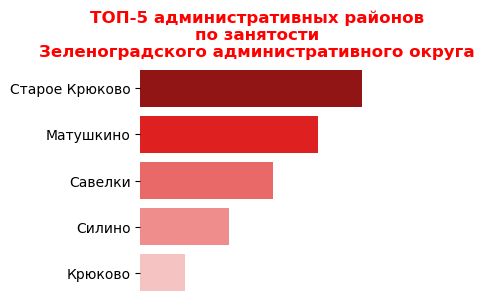

In [97]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_workday_rating.values[:5], y = zelenograd_okrug_workday_rating.index[:5], \
            palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо занятости\nЗеленоградского административного округа', c='r', \
          fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [98]:
# расчет рейтинга
zelenograd_okrug_workday_rating = (is_workday / no_workday).mean(axis=1).sort_values(ascending=True).rank(ascending=False)
zelenograd_okrug_workday_rating

adm_name
Крюково          5.00
Силино           4.00
Савелки          3.00
Матушкино        2.00
Старое Крюково   1.00
dtype: float64

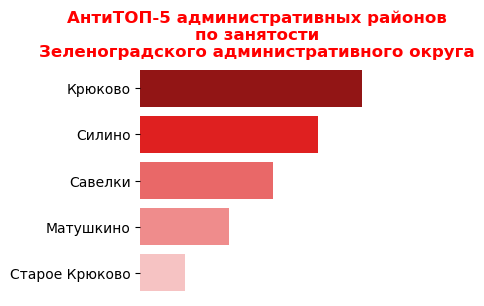

In [99]:
# визуализация антирейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_workday_rating.values[:5], y = zelenograd_okrug_workday_rating.index[:5], \
            palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо занятости\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [100]:
# расчет показателей в целом по административному району
zelenograd_okrug_time_interval =  zelenograd_okrug.groupby(['adm_name', 'dt', 'time_interval'], \
                                                           as_index=False)[indicators].mean()
zelenograd_okrug_time_interval.head()

,adm_name,dt,time_interval,cnt_total,cnt_long,cnt_work,cnt_loc,cnt_long_work,cnt_long_loc
0,Крюково,2021-09-01,0-6,"1,045.43",934.77,55.75,423.40,49.80,384.90
1,Крюково,2021-09-01,12-18,951.75,666.60,115.20,277.11,79.49,211.54
2,Крюково,2021-09-01,18-24,"1,022.90",768.98,64.43,383.87,51.13,301.49
3,Крюково,2021-09-01,6-12,"1,015.77",722.43,116.28,304.91,80.92,237.14
4,Крюково,2021-09-02,0-6,"1,049.35",933.27,56.54,434.44,50.01,393.71


In [101]:
# административные районы
zelenograd_okrug_time_interval['adm_name'].unique()

array(['Крюково', 'Матушкино', 'Савелки', 'Силино', 'Старое Крюково'],
      dtype=object)

In [102]:
# временные интервалы
zelenograd_okrug_time_interval['time_interval'].unique()

array(['0-6', '12-18', '18-24', '6-12'], dtype=object)

In [103]:
# показатели изменения плотности населения
indicators

Index(['cnt_total', 'cnt_long', 'cnt_work', 'cnt_loc', 'cnt_long_work',
       'cnt_long_loc'],
      dtype='object')

In [104]:
# расчет стационарности временного ряда (степень изменчивости)
adm_name = []
time_interval = []
indicators_list = []
adfuller_list = []
for name in zelenograd_okrug_time_interval['adm_name'].unique():
    for interval in zelenograd_okrug_time_interval['time_interval'].unique():
        for indicator in indicators:
            p_adfuller = adfuller(zelenograd_okrug_time_interval[(zelenograd_okrug_time_interval['adm_name'] == name) \
                             & (zelenograd_okrug_time_interval['time_interval'] == interval)][indicator])[1]
            adm_name.append(name)
            time_interval.append(interval)
            indicators_list.append(indicator)
            adfuller_list.append(p_adfuller)

In [105]:
# создание DataFrame с расчитаными показателями изменчивости данных
zelenograd_okrug_adfuller = pd.DataFrame([adm_name, time_interval, indicators_list, adfuller_list], \
                                        index=['adm_name', 'time_interval', 'indicator', 'adfuller']).T
zelenograd_okrug_adfuller.head()

,adm_name,time_interval,indicator,adfuller
0,Крюково,0-6,cnt_total,0.14
1,Крюково,0-6,cnt_long,0.06
2,Крюково,0-6,cnt_work,0.33
3,Крюково,0-6,cnt_loc,0.40
4,Крюково,0-6,cnt_long_work,0.71


In [106]:
# преобразование DataFrame для удобства анализа и интерпритации рейтинга
zelenograd_okrug_adfuller = pd.pivot_table(zelenograd_okrug_adfuller, values='adfuller', \
                                         index=['adm_name', 'time_interval'], columns='indicator')
zelenograd_okrug_adfuller.head()

indicator                cnt_loc  cnt_long  cnt_long_loc  cnt_long_work  \
adm_name  time_interval                                                   
Крюково   0-6               0.40      0.06          0.07           0.71   
          12-18             0.29      0.88          0.25           0.52   
          18-24             0.00      0.02          0.00           0.73   
          6-12              0.42      0.07          0.43           0.66   
Матушкино 0-6               0.01      0.32          0.05           0.95   

indicator                cnt_total  cnt_work  
adm_name  time_interval                       
Крюково   0-6                 0.14      0.33  
          12-18               0.13      0.31  
          18-24               0.22      0.52  
          6-12                0.05      0.62  
Матушкино 0-6                 0.47      0.95

In [107]:
# упорядочивавние признаков
zelenograd_okrug_adfuller = zelenograd_okrug_adfuller[['cnt_total', 'cnt_long', 'cnt_work', \
                                                       'cnt_long_work', 'cnt_loc', 'cnt_long_loc']]

In [108]:
# преобразование индекса в признак
zelenograd_okrug_adfuller = zelenograd_okrug_adfuller.reset_index()

In [109]:
# подсчет рейтинга
zelenograd_okrug_adfuller_rating = zelenograd_okrug_adfuller.groupby('adm_name') \
                      [['cnt_total', 'cnt_long', 'cnt_work', 'cnt_long_work', 'cnt_loc', 'cnt_long_loc']].mean()

In [110]:
zelenograd_okrug_adfuller_rating

indicator,cnt_total,cnt_long,cnt_work,cnt_long_work,cnt_loc,cnt_long_loc
adm_name,,,,,,
Крюково,0.14,0.25,0.45,0.65,0.28,0.19
Матушкино,0.38,0.45,0.85,0.85,0.15,0.17
Савелки,0.51,0.40,0.32,0.65,0.24,0.15
Силино,0.59,0.36,0.75,0.80,0.22,0.10
Старое Крюково,0.54,0.26,0.66,0.69,0.34,0.35


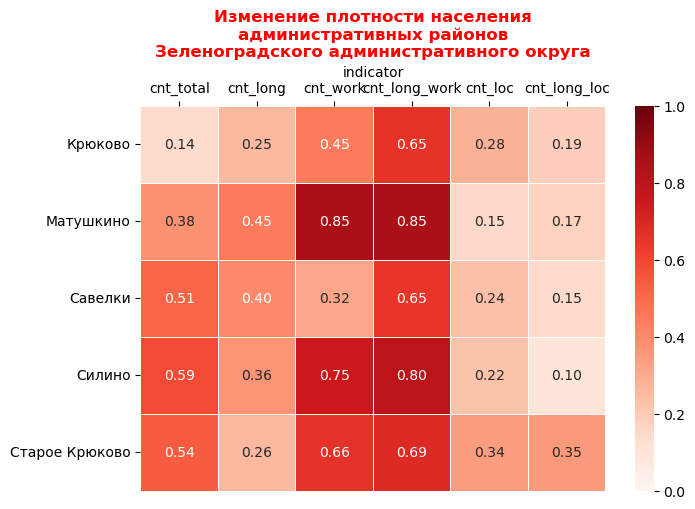

In [111]:
# визуализация рассчитанных показателей изменения плотности по административным районам
f, ax = plt.subplots(figsize=(7.5, 5))
sns.heatmap(zelenograd_okrug_adfuller_rating, vmin=0, vmax=1, linewidths=.5, fmt='.2f', annot=True, cmap='Reds', cbar=True)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
plt.xticks(rotation=0, ha="center")
plt.title('Изменение плотности населения\nадминистративных районов\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.yticks()
plt.ylabel('')
plt.show()

In [112]:
# рейтинг административных районов по динамике изменения плотности численности населения
zelenograd_okrug_rating = zelenograd_okrug_adfuller_rating.mean(axis=1).sort_values(ascending=True).rank(ascending=False)
zelenograd_okrug_rating

adm_name
Крюково          5.00
Савелки          4.00
Старое Крюково   3.00
Силино           2.00
Матушкино        1.00
dtype: float64

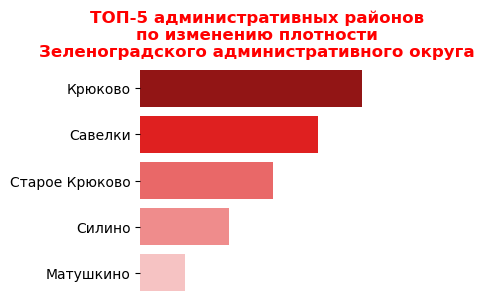

In [113]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_rating.values[:5], y = zelenograd_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо изменению плотности\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [114]:
# антирейтинг административных районов по динамике изменения плотности численности населения
zelenograd_okrug_rating = zelenograd_okrug_adfuller_rating.mean(axis=1).sort_values(ascending=False).rank(ascending=True)
zelenograd_okrug_rating

adm_name
Матушкино        5.00
Силино           4.00
Старое Крюково   3.00
Савелки          2.00
Крюково          1.00
dtype: float64

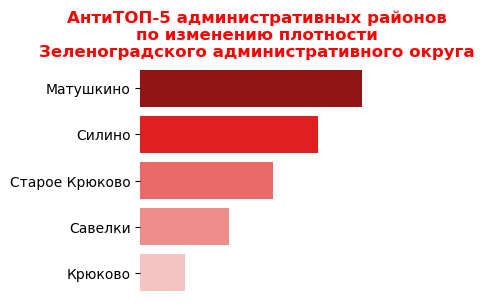

In [115]:
# визуализация рейтинга административных районов по динамике изменения плотности численности населения
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_rating.values[:5], y = zelenograd_okrug_rating.index[:5], palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо изменению плотности\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

### Анализ динамики перемещения населения

In [116]:
# считывание данных динамики перемещения населения
cmatrix = pd.read_csv('data/03_CMatrix_202109.csv')

In [117]:
# вывод данных
cmatrix.head()

,is_vacation,time_interval,departure_zid,arrival_zid,median_customers_cnt,median_customers_cnt_metro,median_customers_cnt_home_work,median_customers_cnt_work_home
0,0,1,32909,39217,1.00,0.00,0.00,0.00
1,0,1,32909,116651,1.00,1.00,0.00,0.00
2,0,1,32910,37228,1.00,0.00,0.00,0.00
3,0,1,33261,33261,1.00,0.00,0.00,0.00
4,0,1,33262,35370,1.00,0.00,0.00,0.00


In [118]:
# признаки данных
cmatrix.columns

Index(['is_vacation', 'time_interval', 'departure_zid', 'arrival_zid',
       'median_customers_cnt', 'median_customers_cnt_metro',
       'median_customers_cnt_home_work', 'median_customers_cnt_work_home'],
      dtype='object')

In [119]:
'median_customers_cnt'.replace('median_customers_', '')

'cnt'

In [120]:
# переименование признаков
cmatrix.columns = [column.replace('median_customers_', '') for column in cmatrix.columns]

In [121]:
# проверка изменений
cmatrix.columns

Index(['is_vacation', 'time_interval', 'departure_zid', 'arrival_zid', 'cnt',
       'cnt_metro', 'cnt_home_work', 'cnt_work_home'],
      dtype='object')

In [122]:
# признак значения выходного дня
cmatrix['is_vacation'].unique()

array([0, 1], dtype=int64)

In [123]:
# соответствие кодировки данным
data_is_vacation = {0 : 'рабочий', 1 : 'выходной'}

In [124]:
# преобразование признака
cmatrix['is_vacation'] = cmatrix['is_vacation'].map(data_is_vacation)

In [125]:
# временные интервалы
cmatrix['time_interval'].unique()

array([1, 2, 3, 4], dtype=int64)

In [126]:
# данные кодировки интервалов
time_interval = {1 : '0-6', 2 : '6-12', 3 : '12-18', 4 : '18-24'}

In [127]:
# вывод данных
cmatrix.head()

,is_vacation,time_interval,departure_zid,arrival_zid,cnt,cnt_metro,cnt_home_work,cnt_work_home
0,рабочий,1,32909,39217,1.00,0.00,0.00,0.00
1,рабочий,1,32909,116651,1.00,1.00,0.00,0.00
2,рабочий,1,32910,37228,1.00,0.00,0.00,0.00
3,рабочий,1,33261,33261,1.00,0.00,0.00,0.00
4,рабочий,1,33262,35370,1.00,0.00,0.00,0.00


In [128]:
# данные кодировки интервалов
time_interval = {1 : '0-6', 2 : '6-12', 3 : '12-18', 4 : '18-24'}

In [129]:
# преобразование признака
cmatrix['time_interval'] = cmatrix['time_interval'].map(time_interval)

In [130]:
# вывод данных
cmatrix.head()

,is_vacation,time_interval,departure_zid,arrival_zid,cnt,cnt_metro,cnt_home_work,cnt_work_home
0,рабочий,0-6,32909,39217,1.00,0.00,0.00,0.00
1,рабочий,0-6,32909,116651,1.00,1.00,0.00,0.00
2,рабочий,0-6,32910,37228,1.00,0.00,0.00,0.00
3,рабочий,0-6,33261,33261,1.00,0.00,0.00,0.00
4,рабочий,0-6,33262,35370,1.00,0.00,0.00,0.00


In [131]:
# показатели динамики перемещения
indicators = cmatrix.columns[4:]
indicators

Index(['cnt', 'cnt_metro', 'cnt_home_work', 'cnt_work_home'], dtype='object')

In [132]:
# выборка секторов по Зеленоградскому административному округу
zelenograd_adm_zid = adm.query('okrug_name == "Зеленоградский административный округ"')['adm_name'].index
zelenograd_adm_zid

Int64Index([142801, 142803, 142805, 143318, 143321, 143323, 143324, 143844,
            143846, 143848,
            ...
            150700, 150702, 150704, 150707, 150709, 150711, 150713, 150715,
            150717, 151166],
           dtype='int64', length=252)

In [133]:
# проверка наличия данных по Зеленоградскому административному округу
sum(cmatrix['departure_zid'].isin(zelenograd_adm_zid))

0

In [134]:
# статистика по значению номера сектора
cmatrix['departure_zid'].describe()

count   65,062,129.00
mean       103,357.74
std         15,558.26
min         32,909.00
25%         93,874.00
50%        105,145.00
75%        114,435.00
max        139,343.00
Name: departure_zid, dtype: float64

In [135]:
# импорт библиотеки статистических отчетов
from scipy import stats

In [136]:
# статистика по значению номера сектора в Зеленоградском районе
stats.describe(zelenograd_adm_zid)

DescribeResult(nobs=252, minmax=(142801, 151166), mean=147444.64682539683, variance=3779421.7751691644, skewness=-0.25509542880956754, kurtosis=-0.6530504150772005)

In [137]:
# проверка на наличие данных
cmatrix['departure_zid'].max() >=  min(zelenograd_adm_zid)

False

Данные по Зеленоградскому административному округу в части динамики перемещения населения **отсутствуют**

### Анализ корреспонденции дом-работа

In [138]:
# считывание данных корреспонденции дом-работа
cmatrix_home_work = pd.read_csv('data/04_CMatrix_Home_work_202109.csv')

In [139]:
# вывод данных
cmatrix_home_work.head()

,dt,home_zid,work_zid,customers_cnt
0,2021-09-30,32909,-1,1
1,2021-09-30,32910,-1,2
2,2021-09-30,33262,95037,1
3,2021-09-30,33264,-1,2
4,2021-09-30,33614,-1,2


In [140]:
# выборка данных
cmatrix_home_work_yes = cmatrix_home_work[cmatrix_home_work['work_zid'] != -1]
cmatrix_home_work_yes.head()

,dt,home_zid,work_zid,customers_cnt
2,2021-09-30,33262,95037,1
13,2021-09-30,33974,33621,1
14,2021-09-30,33974,99817,1
16,2021-09-30,33977,34678,1
19,2021-09-30,33979,33979,12


In [141]:
# преобразование признака в географические координаты
adm['geometry'] = adm['geometry'].apply(wkt.loads)

In [142]:
# задание геометрии DataFrame
adm = adm.set_geometry('geometry')

In [143]:
# расчет центров сектора
adm['centroid'] = adm['geometry'].centroid

In [144]:
# объединение данных с данными административных районов
cmatrix_home_work_yes = cmatrix_home_work_yes.merge(adm, left_on='home_zid', right_on='cell_zid') \
                       .merge(adm, left_on='work_zid', right_on='cell_zid', suffixes=('_home', '_work'))
cmatrix_home_work_yes.head()

,dt,home_zid,work_zid,customers_cnt,geometry_home,cell_zid_home,adm_name_home,okrug_name_home,sub_ter_home,area_home,conts_zid_home,centroid_home,geometry_work,cell_zid_work,adm_name_work,okrug_name_work,sub_ter_work,area_work,conts_zid_work,centroid_work
0,2021-09-30,33262,95037,1,"MULTIPOLYGON (((37.03343 55.14751, 37.03341 55...",33262,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.03802 55.14745),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200)
1,2021-09-30,35730,95037,1,"MULTIPOLYGON (((37.03309 55.17622, 37.03304 55...",35730,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.03699 55.17848),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200)
2,2021-09-30,43408,95037,1,"MULTIPOLYGON (((37.09506 55.25730, 37.09502 55...",43408,Роговское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.09897 55.25955),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200)
3,2021-09-30,43936,95037,1,"MULTIPOLYGON (((37.15794 55.26198, 37.15790 55...",43936,Вороновское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.16185 55.26424),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200)
4,2021-09-30,43938,95037,1,"MULTIPOLYGON (((37.17367 55.26202, 37.17363 55...",43938,Вороновское,Троицкий административный округ,Новая Москва,0.25,1,POINT (37.17758 55.26428),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200)


In [145]:
# пересчет показателей изменения численности населения с учетом пересечения секторов
cmatrix_home_work_yes['customers_cnt_home'] = cmatrix_home_work_yes['customers_cnt'] / cmatrix_home_work_yes['conts_zid_home']

In [146]:
# рассчет расстояния перемещения
cmatrix_home_work_yes['centroid_home'].iloc[0].distance(cmatrix_home_work_yes['centroid_work'].iloc[0])

0.6933152450655977

In [147]:
# рассчет расстояния перемещения
cmatrix_home_work_yes['distance'] = [point_home.distance(point_work) \
                           for point_home, point_work in zip(cmatrix_home_work_yes['centroid_home'].values, \
                                                             cmatrix_home_work_yes['centroid_work'].values)]

In [148]:
# вывод данных
cmatrix_home_work_yes.head()

,dt,home_zid,work_zid,customers_cnt,geometry_home,cell_zid_home,adm_name_home,okrug_name_home,sub_ter_home,area_home,...,geometry_work,cell_zid_work,adm_name_work,okrug_name_work,sub_ter_work,area_work,conts_zid_work,centroid_work,customers_cnt_home,distance
0,2021-09-30,33262,95037,1,"MULTIPOLYGON (((37.03343 55.14751, 37.03341 55...",33262,Роговское,Троицкий административный округ,Новая Москва,0.25,...,"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200),1.00,0.69
1,2021-09-30,35730,95037,1,"MULTIPOLYGON (((37.03309 55.17622, 37.03304 55...",35730,Роговское,Троицкий административный округ,Новая Москва,0.25,...,"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200),1.00,0.67
2,2021-09-30,43408,95037,1,"MULTIPOLYGON (((37.09506 55.25730, 37.09502 55...",43408,Роговское,Троицкий административный округ,Новая Москва,0.25,...,"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200),1.00,0.57
3,2021-09-30,43936,95037,1,"MULTIPOLYGON (((37.15794 55.26198, 37.15790 55...",43936,Вороновское,Троицкий административный округ,Новая Москва,0.25,...,"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200),1.00,0.52
4,2021-09-30,43938,95037,1,"MULTIPOLYGON (((37.17367 55.26202, 37.17363 55...",43938,Вороновское,Троицкий административный округ,Новая Москва,0.25,...,"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,Старая Москва,0.25,1,POINT (37.52392 55.64200),1.00,0.51


In [149]:
# удаление лишних признаков
cmatrix_home_work_yes = cmatrix_home_work_yes.drop(columns=['home_zid', 'work_zid', 'sub_ter_home', \
                                                            'sub_ter_work', 'conts_zid_home', 'conts_zid_work'])

In [150]:
# вывод данных
cmatrix_home_work_yes.head()

,dt,customers_cnt,geometry_home,cell_zid_home,adm_name_home,okrug_name_home,area_home,centroid_home,geometry_work,cell_zid_work,adm_name_work,okrug_name_work,area_work,centroid_work,customers_cnt_home,distance
0,2021-09-30,1,"MULTIPOLYGON (((37.03343 55.14751, 37.03341 55...",33262,Роговское,Троицкий административный округ,0.25,POINT (37.03802 55.14745),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.69
1,2021-09-30,1,"MULTIPOLYGON (((37.03309 55.17622, 37.03304 55...",35730,Роговское,Троицкий административный округ,0.25,POINT (37.03699 55.17848),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.67
2,2021-09-30,1,"MULTIPOLYGON (((37.09506 55.25730, 37.09502 55...",43408,Роговское,Троицкий административный округ,0.25,POINT (37.09897 55.25955),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.57
3,2021-09-30,1,"MULTIPOLYGON (((37.15794 55.26198, 37.15790 55...",43936,Вороновское,Троицкий административный округ,0.25,POINT (37.16185 55.26424),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.52
4,2021-09-30,1,"MULTIPOLYGON (((37.17367 55.26202, 37.17363 55...",43938,Вороновское,Троицкий административный округ,0.25,POINT (37.17758 55.26428),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.51


In [151]:
# округа г. Москва
cmatrix_home_work_yes['okrug_name_home'].unique()

array(['Троицкий административный округ',
       'Новомосковский административный округ',
       'Юго-Западный административный округ', 'Видное (Ленинский)',
       'Южный административный округ', 'Западный административный округ',
       'Юго-Восточный административный округ', 'Котельники', 'Люберцы',
       'Одинцово', 'Восточный административный округ',
       'Центральный административный округ', 'Балашиха', 'Реутов',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ', 'Химки',
       'Зеленоградский административный округ', 'Дзержинский', 'Чехов',
       'Подольск', 'Наро-Фоминск', 'Красногорск', 'Мытищи',
       'Долгопрудный', 'Солнечногорск'], dtype=object)

In [152]:
# выборка данных по выбранному округу
zelenograd_okrug_sankey = cmatrix_home_work_yes[(cmatrix_home_work_yes['okrug_name_home'] == 'Зеленоградский административный округ') | \
                                              (cmatrix_home_work_yes['okrug_name_work'] == 'Зеленоградский административный округ')]
zelenograd_okrug_sankey.head()

,dt,customers_cnt,geometry_home,cell_zid_home,adm_name_home,okrug_name_home,area_home,centroid_home,geometry_work,cell_zid_work,adm_name_work,okrug_name_work,area_work,centroid_work,customers_cnt_home,distance
1068,2021-09-30,1,"MULTIPOLYGON (((37.15967 55.97615, 37.15963 55...",135415,Крюково,Зеленоградский административный округ,0.25,POINT (37.16366 55.97840),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.49
2614,2021-09-30,1,"MULTIPOLYGON (((37.16776 55.96719, 37.16772 55...",134514,Крюково,Зеленоградский административный округ,0.25,POINT (37.17175 55.96944),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),1.00,0.45
2615,2021-09-30,1,"MULTIPOLYGON (((37.20756 55.99873, 37.20753 56...",137635,Матушкино,Зеленоградский административный округ,0.25,POINT (37.21097 56.00153),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),0.50,0.44
2616,2021-09-30,1,"MULTIPOLYGON (((37.21557 56.00045, 37.21558 55...",137635,Савелки,Зеленоградский административный округ,0.25,POINT (37.21268 55.99992),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),0.50,0.44
4368,2021-09-30,1,"MULTIPOLYGON (((37.19171 55.97623, 37.19168 55...",135419,Старое Крюково,Зеленоградский административный округ,0.25,POINT (37.19570 55.97849),"MULTIPOLYGON (((37.50407 55.69366, 37.50407 55...",102174,Раменки,Западный административный округ,0.25,POINT (37.50805 55.69590),1.00,0.42


In [153]:
# импорт библиотеки визуализации данных
import plotly.graph_objects as go

In [154]:
# подсчет суммарного количества населения корреспонденции дом-работа
zelenograd_okrug_sankey = zelenograd_okrug_sankey.groupby(['okrug_name_home', 'okrug_name_work'], as_index=False) \
                        ['customers_cnt_home'].sum().sort_values(by=['okrug_name_home', 'okrug_name_work'])
zelenograd_okrug_sankey.head()

,okrug_name_home,okrug_name_work,customers_cnt_home
0,Балашиха,Зеленоградский административный округ,1.00
1,Видное (Ленинский),Зеленоградский административный округ,1.50
2,Восточный административный округ,Зеленоградский административный округ,303.83
3,Дзержинский,Зеленоградский административный округ,0.50
4,Долгопрудный,Зеленоградский административный округ,1.17


In [155]:
# расчет доли населения корреспонденции дом-работа
zelenograd_okrug_sankey['customers_cnt_home_share'] = round(zelenograd_okrug_sankey['customers_cnt_home'] / \
                                                    zelenograd_okrug_sankey['customers_cnt_home'].sum() *100, 1)

In [156]:
# выборка данных
zelenograd_okrug_sankey = zelenograd_okrug_sankey[zelenograd_okrug_sankey['customers_cnt_home_share'] > 1]

In [157]:
# импорт библиотеки кодировки данных 
from sklearn import preprocessing

In [158]:
# вызов функции кодировки данных
le = preprocessing.LabelEncoder()

In [159]:
# сопоставление данных
set(zelenograd_okrug_sankey['okrug_name_home']) - set(zelenograd_okrug_sankey['okrug_name_work'])

set()

In [160]:
# сопоставление данных
set(zelenograd_okrug_sankey['okrug_name_work']) - set(zelenograd_okrug_sankey['okrug_name_home'])

{'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Центральный административный округ'}

In [161]:
# присвоение меток данным
le.fit(zelenograd_okrug_sankey['okrug_name_work'])

LabelEncoder()

In [162]:
# классы данных
le.classes_

array(['Зеленоградский административный округ',
       'Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ', 'Солнечногорск',
       'Центральный административный округ'], dtype=object)

In [163]:
# перекодировка данных
zelenograd_okrug_sankey['okrug_name_home'] = le.transform(zelenograd_okrug_sankey['okrug_name_home'])

In [164]:
# перекодировка данных
zelenograd_okrug_sankey['okrug_name_work'] = le.transform(zelenograd_okrug_sankey['okrug_name_work'])

In [165]:
# вывод данных
zelenograd_okrug_sankey.head()

,okrug_name_home,okrug_name_work,customers_cnt_home,customers_cnt_home_share
11,0,0,"55,582.83",71.40
20,0,1,"2,839.50",3.60
21,0,2,"1,289.67",1.70
22,0,3,864.33,1.10
23,0,4,"3,559.33",4.60


In [166]:
# смена типа данных
zelenograd_okrug_sankey['customers_cnt_home'] = zelenograd_okrug_sankey['customers_cnt_home'].astype('int')

In [167]:
# признак домашнего округ
zelenograd_okrug_sankey['okrug_name_home'].values

array([0, 0, 0, 0, 0, 0, 1, 4])

In [168]:
# классы данных
classes = list(le.classes_) + list(le.classes_)
classes

['Зеленоградский административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Солнечногорск',
 'Центральный административный округ',
 'Зеленоградский административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Солнечногорск',
 'Центральный административный округ']

In [169]:
# признак рабочего округа
zelenograd_okrug_sankey['okrug_name_work'].values

array([0, 1, 2, 3, 4, 5, 0, 0])

In [170]:
# признак домашнего округа
zelenograd_okrug_sankey['okrug_name_home'].values

array([0, 0, 0, 0, 0, 0, 1, 4])

In [171]:
# значение доли населения
zelenograd_okrug_sankey['customers_cnt_home_share'].values

array([71.4,  3.6,  1.7,  1.1,  4.6,  4.4,  1.3,  3.6])

In [172]:
# вывод данных
zelenograd_okrug_sankey

,okrug_name_home,okrug_name_work,customers_cnt_home,customers_cnt_home_share
11,0,0,55582,71.40
20,0,1,2839,3.60
21,0,2,1289,1.70
22,0,3,864,1.10
23,0,4,3559,4.60
26,0,5,3386,4.40
37,1,0,1005,1.30
40,4,0,2781,3.60


In [173]:
# классы данных
classes

['Зеленоградский административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Солнечногорск',
 'Центральный административный округ',
 'Зеленоградский административный округ',
 'Северный административный округ',
 'Северо-Восточный административный округ',
 'Северо-Западный административный округ',
 'Солнечногорск',
 'Центральный административный округ']

In [186]:
# визуализация перемещения корреспонденции дом-работа
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 30,
      thickness = 50,
      line = dict(color = 'black', width = 0.5),
      label = classes,
      color = ['#520202', '#910a0a', '#a70000', '#ff0000', '#f24d07', '#ff7b7b', \
               '#520202', '#910a0a', '#a70000', '#ff0000', '#f24d07', '#ff7b7b']
    ),
    link = dict(
      source = zelenograd_okrug_sankey['okrug_name_home'].values, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [0, 7, 8, 9, 10, 11, 0, 0],
      value = zelenograd_okrug_sankey['customers_cnt_home_share'].values
  ))])

fig.update_layout(title_text='<b>Поток корреспонденции дом-работа<br>в Зеленоградском административном округе<b>', \
                  title_x=0.5, title_font_color='red', font_size=12)
fig.show()

In [172]:
# выборка данных по выбранному округу
zelenograd_okrug = cmatrix_home_work_yes[cmatrix_home_work_yes['okrug_name_home'] == 'Зеленоградский административный округ']
zelenograd_okrug.head()

,dt,customers_cnt,geometry_home,cell_zid_home,adm_name_home,okrug_name_home,area_home,centroid_home,geometry_work,cell_zid_work,adm_name_work,okrug_name_work,area_work,centroid_work,customers_cnt_home,distance
1068,2021-09-30,1,"MULTIPOLYGON (((37.15967 55.97615, 37.15963 55...",135415,Крюково,Зеленоградский административный округ,0.25,POINT (37.16366 55.97840),"MULTIPOLYGON (((37.51995 55.63976, 37.51995 55...",95037,Коньково,Юго-Западный административный округ,0.25,POINT (37.52392 55.64200),1.00,0.49
2614,2021-09-30,1,"MULTIPOLYGON (((37.16776 55.96719, 37.16772 55...",134514,Крюково,Зеленоградский административный округ,0.25,POINT (37.17175 55.96944),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),1.00,0.45
2615,2021-09-30,1,"MULTIPOLYGON (((37.20756 55.99873, 37.20753 56...",137635,Матушкино,Зеленоградский административный округ,0.25,POINT (37.21097 56.00153),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),0.50,0.44
2616,2021-09-30,1,"MULTIPOLYGON (((37.21557 56.00045, 37.21558 55...",137635,Савелки,Зеленоградский административный округ,0.25,POINT (37.21268 55.99992),"MULTIPOLYGON (((37.50407 55.67120, 37.50407 55...",99196,Проспект Вернадского,Западный административный округ,0.25,POINT (37.50804 55.67345),0.50,0.44
4368,2021-09-30,1,"MULTIPOLYGON (((37.19171 55.97623, 37.19168 55...",135419,Старое Крюково,Зеленоградский административный округ,0.25,POINT (37.19570 55.97849),"MULTIPOLYGON (((37.50407 55.69366, 37.50407 55...",102174,Раменки,Западный административный округ,0.25,POINT (37.50805 55.69590),1.00,0.42


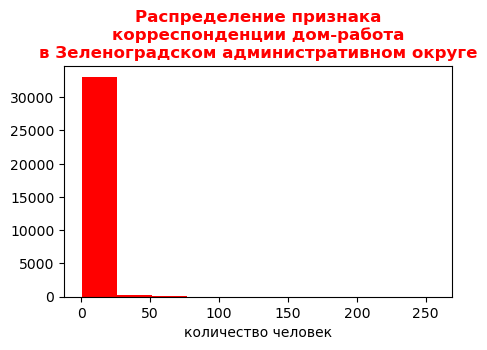

In [173]:
# визуализация распределения признака корреспонденции дом-работа
plt.figure(figsize=(5, 3))
plt.hist(zelenograd_okrug['customers_cnt_home'], color='r')
plt.title(f'Распределение признака\nкорреспонденции дом-работа\nв Зеленоградском административном округе', \
          c='r', fontweight='bold', fontsize=12)
plt.xlabel('количество человек')
plt.show()

In [174]:
# расчет обеспеченности округа рабочими местами
(zelenograd_okrug['okrug_name_home'] == zelenograd_okrug['okrug_name_work']).sum() / zelenograd_okrug.shape[0] *100

44.34337691870381

In [175]:
df = pd.Series([1], index=[1])
df

1    1
dtype: int64

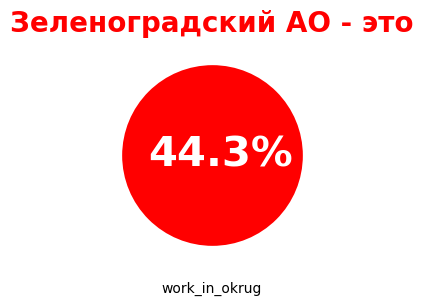

In [176]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(df, x=df.index, y=df.values, size=61.5, \
                sizes=[20000], c='r', legend=False)
plt.annotate('44.3%', xy=(0.97, 0.995), fontsize=30, weight='bold', c='w')
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('work_in_okrug')
plt.title('Зеленоградский АО - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

In [177]:
(zelenograd_okrug['adm_name_home'] == zelenograd_okrug['adm_name_work']).sum() / zelenograd_okrug.shape[0] *100

11.753089374943897

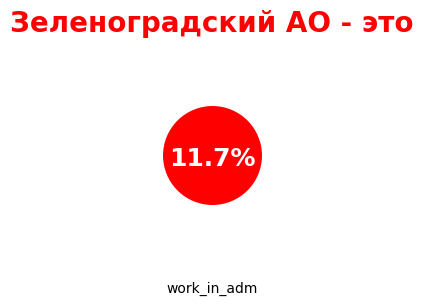

In [178]:
# визуализация количества округов, субъектов и административных районов Московской агломерации
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(df, x=df.index, y=df.values, size=61.5, \
                sizes=[6000], c='r', legend=False)
plt.annotate('11.7%', xy=(0.98, 0.995), fontsize=18, weight='bold', c='w')
plt.box(on=None)
plt.xticks([])
plt.yticks([])
plt.xlabel('work_in_adm')
plt.title('Зеленоградский АО - это', loc='center', fontweight='bold', color='r', fontsize=20)
plt.show()

In [179]:
# подсчет отношения жителей работающих в своем административном районе
zelenograd_okrug_adm_work = (zelenograd_okrug.groupby(['adm_name_work', 'adm_name_home'])['customers_cnt_home'].sum() / \
                          zelenograd_okrug.groupby('adm_name_home')['customers_cnt_home'].sum() *100).to_frame().reset_index()
zelenograd_okrug_adm_work.head()

,adm_name_work,adm_name_home,customers_cnt_home
0,Академический,Крюково,0.07
1,Академический,Матушкино,0.09
2,Академический,Савелки,0.11
3,Академический,Силино,0.07
4,Академический,Старое Крюково,0.11


In [180]:
# выборка административных районов Троицкого административного округа
zelenograd_okrug_adm_work = zelenograd_okrug_adm_work[zelenograd_okrug_adm_work['adm_name_work'] \
                                                  .isin(zelenograd_okrug_adm_work['adm_name_home'].unique())]
zelenograd_okrug_adm_work.head()

,adm_name_work,adm_name_home,customers_cnt_home
238,Крюково,Крюково,33.92
239,Крюково,Матушкино,4.75
240,Крюково,Савелки,4.65
241,Крюково,Силино,12.74
242,Крюково,Старое Крюково,13.44


In [181]:
# отношения жителей работающих в своем административном районе
zelenograd_okrug_adm_work = zelenograd_okrug_adm_work[zelenograd_okrug_adm_work['adm_name_work'] == \
                                                  zelenograd_okrug_adm_work['adm_name_home']]
zelenograd_okrug_adm_work

,adm_name_work,adm_name_home,customers_cnt_home
238,Крюково,Крюково,33.92
311,Матушкино,Матушкино,32.21
492,Савелки,Савелки,32.26
533,Силино,Силино,28.09
569,Старое Крюково,Старое Крюково,27.67


In [182]:
# отношения жителей работающих в своем административном районе
zelenograd_okrug_adm_work = zelenograd_okrug_adm_work.drop(columns='adm_name_work') \
                            .rename(columns={'adm_name_home' : 'adm_name'})
zelenograd_okrug_adm_work

,adm_name,customers_cnt_home
238,Крюково,33.92
311,Матушкино,32.21
492,Савелки,32.26
533,Силино,28.09
569,Старое Крюково,27.67


In [183]:
# рейтинг административных районов
zelenograd_okrug_adm_work_rank = zelenograd_okrug_adm_work.set_index('adm_name') \
                              .sort_values(by='customers_cnt_home', ascending=False).rank(ascending=True)
zelenograd_okrug_adm_work_rank

,customers_cnt_home
adm_name,
Крюково,5.00
Савелки,4.00
Матушкино,3.00
Силино,2.00
Старое Крюково,1.00


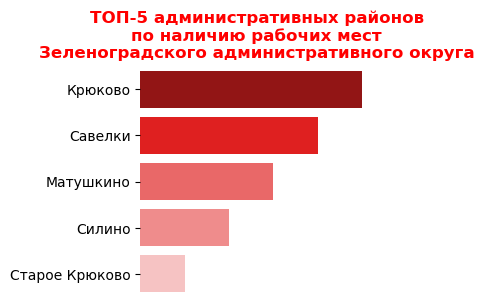

In [184]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_adm_work_rank['customers_cnt_home'].values[:5], y = zelenograd_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо наличию рабочих мест\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [185]:
# антирейтинг административных районов
zelenograd_okrug_adm_work_rank = zelenograd_okrug_adm_work.set_index('adm_name') \
                              .sort_values(by='customers_cnt_home', ascending=True).rank(ascending=False)
zelenograd_okrug_adm_work_rank

,customers_cnt_home
adm_name,
Старое Крюково,5.00
Силино,4.00
Матушкино,3.00
Савелки,2.00
Крюково,1.00


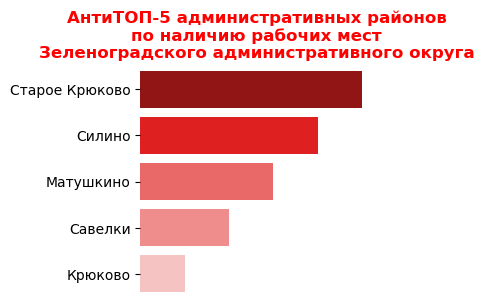

In [186]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_adm_work_rank['customers_cnt_home'].values[:5], y = zelenograd_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо наличию рабочих мест\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [187]:
# расчет средней дистанции перемещения по административным районам
zelenograd_okrug.groupby('adm_name_home')['distance'].mean().sort_values(ascending=True)

adm_name_home
Савелки          0.21
Матушкино        0.21
Силино           0.23
Старое Крюково   0.24
Крюково          0.28
Name: distance, dtype: float64

In [189]:
# рейтинг административных районов
zelenograd_okrug_adm_work_rank = zelenograd_okrug.groupby('adm_name_home')['distance'].mean() \
                               .sort_values(ascending=True).rank(ascending=False)
zelenograd_okrug_adm_work_rank

adm_name_home
Савелки          5.00
Матушкино        4.00
Силино           3.00
Старое Крюково   2.00
Крюково          1.00
Name: distance, dtype: float64

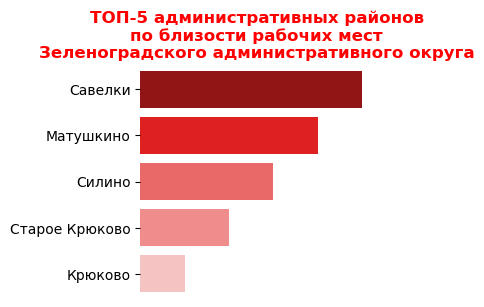

In [190]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_adm_work_rank.values[:5], y = zelenograd_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('ТОП-5 административных районов\nпо близости рабочих мест\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()

In [191]:
# антирейтинг административных районов
zelenograd_okrug_adm_work_rank = zelenograd_okrug.groupby('adm_name_home')['distance'].mean() \
                               .sort_values(ascending=False).rank(ascending=True)
zelenograd_okrug_adm_work_rank

adm_name_home
Крюково          5.00
Старое Крюково   4.00
Силино           3.00
Матушкино        2.00
Савелки          1.00
Name: distance, dtype: float64

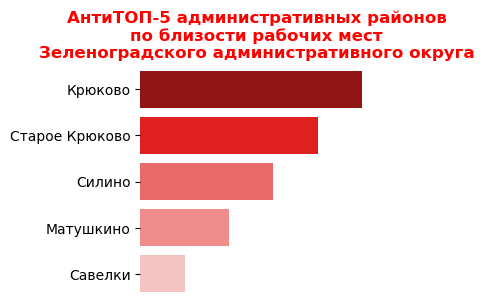

In [192]:
# визуализация рейтинг административных районов
plt.figure(figsize=(3,3))
sns.barplot(x = zelenograd_okrug_adm_work_rank.values[:5], y = zelenograd_okrug_adm_work_rank.index[:5], \
            palette=sns.color_palette(colors))
plt.title('АнтиТОП-5 административных районов\nпо близости рабочих мест\nЗеленоградского административного округа', \
          c='r', fontweight='bold', fontsize=12)
plt.xticks([])
plt.box(on=None)
plt.ylabel('')
plt.show()